In [1]:
from typing import List, Dict, Tuple
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
font = {'family': 'sans-serif', 'serif': 'Helvetica',
        'size': 25}
plt.rc('font', **font)
legnd = {'fontsize': 20, 'handlelength': 2.0}
plt.rc('legend', **legnd)
mathtext = {'mathtext.default': 'it' } 
plt.rcParams.update(mathtext)

In [2]:
df = pd.read_csv("./features.qlearning.rational.tsv", sep="\t")
df.head()

,exp_ID,alpha_EZ,alpha_ZE,e_return,t5p,t5p_first,tTiny,tTiny_first,total_drug_in
0,qlearning_micEZ70.0,-0.03,0.0,14.211221,[865.72693238],865.726932,[1897.90508463],1897.905085,738.0
1,qlearning_micEZ70.1,0.00,0.0,14.259835,[604.2944531],604.294453,[1879.68666305],1879.686663,756.0
2,qlearning_micEZ70.2,0.02,0.0,14.266188,[601.42283053],601.422831,[1938.02421485],1938.024215,756.0
3,qlearning_micZ140.0,-0.03,0.0,15.230739,[501.00601381],501.006014,[814.11413253],814.114133,306.0
4,qlearning_micZ140.1,0.00,0.0,14.259835,[604.2944531],604.294453,[1879.68666291],1879.686663,756.0


In [3]:
df['policy'] = df['exp_ID'].apply(lambda x: "Q-learning" if x.split("_")[0]=="qlearning" else "Rational")
df['micZ'] = df['exp_ID'].apply(lambda x: float(x.split("Z")[1].split(".")[0]))
df.head()

,exp_ID,alpha_EZ,alpha_ZE,e_return,t5p,t5p_first,tTiny,tTiny_first,total_drug_in,policy,micZ
0,qlearning_micEZ70.0,-0.03,0.0,14.211221,[865.72693238],865.726932,[1897.90508463],1897.905085,738.0,Q-learning,70.0
1,qlearning_micEZ70.1,0.00,0.0,14.259835,[604.2944531],604.294453,[1879.68666305],1879.686663,756.0,Q-learning,70.0
2,qlearning_micEZ70.2,0.02,0.0,14.266188,[601.42283053],601.422831,[1938.02421485],1938.024215,756.0,Q-learning,70.0
3,qlearning_micZ140.0,-0.03,0.0,15.230739,[501.00601381],501.006014,[814.11413253],814.114133,306.0,Q-learning,140.0
4,qlearning_micZ140.1,0.00,0.0,14.259835,[604.2944531],604.294453,[1879.68666291],1879.686663,756.0,Q-learning,140.0


In [4]:
df

,exp_ID,alpha_EZ,alpha_ZE,e_return,t5p,t5p_first,tTiny,tTiny_first,total_drug_in,policy,micZ
0,qlearning_micEZ70.0,-0.03,0.0,14.211221,[865.72693238],865.726932,[1897.90508463],1897.905085,738.0,Q-learning,70.0
1,qlearning_micEZ70.1,0.00,0.0,14.259835,[604.2944531],604.294453,[1879.68666305],1879.686663,756.0,Q-learning,70.0
2,qlearning_micEZ70.2,0.02,0.0,14.266188,[601.42283053],601.422831,[1938.02421485],1938.024215,756.0,Q-learning,70.0
3,qlearning_micZ140.0,-0.03,0.0,15.230739,[501.00601381],501.006014,[814.11413253],814.114133,306.0,Q-learning,140.0
4,qlearning_micZ140.1,0.00,0.0,14.259835,[604.2944531],604.294453,[1879.68666291],1879.686663,756.0,Q-learning,140.0
5,qlearning_micZ140.2,0.02,0.0,11.872186,[1644.30984508 3629.39825039 3736.34285135 396...,1644.309845,[],NaN,1494.0,Q-learning,140.0
6,rational_micEZ70.3,-0.03,0.0,13.941737,[929.25804363],929.258044,[1976.83014739],1976.830147,720.0,Rational,70.0
7,rational_micEZ70.24,0.00,0.0,13.805798,[919.29455394],919.294554,[2319.4929547],2319.492955,810.0,Rational,70.0
8,rational_micEZ70.45,0.02,0.0,13.813937,[916.43345316],916.433453,[2361.38178381],2361.381784,810.0,Rational,70.0
9,rational_micZ140.3,-0.03,0.0,15.126893,[518.33171441],518.331714,[880.62517553],880.625176,360.0,Rational,140.0


In [5]:
print(df['e_return'].min())

11.307487888885724


In [6]:
def policy_efficacy(policies: List[str], mics: List[float]):
    palT_ora = "#FE7F2D"
    palE_gre = "#43b284"
    palT_grey = "#919191"
    
    fig, ax = plt.subplots(1, 4, figsize=(6*4, 5*1), sharex=True, gridspec_kw={'wspace': 0.4})
    
    sim_time = 5760.0 #min
    tscale = 60.0 #convert min to h
    dscale = 10**3 #convert ug/mL to mg/mL
    
    for m in mics:
        lines = []
        for p in policies:
            data = df.loc[(df['micZ'] == m) & (df['policy'] == p), :]
            data = data.fillna(1.1*sim_time)
            
            c = palT_ora if p == "Q-learning" else palE_gre
            mark = 'o' if m == 140.0 else '^'
            lstyle = '-' if m == 140.0 else '--'

            ax[0].plot(data['alpha_EZ'], data['e_return'], 
                       color = c, marker = mark, ls = lstyle, label = p, 
                       markersize = 8)

            ax[1].plot(data['alpha_EZ'], data['tTiny_first'] / tscale, 
                       color = c, marker = mark, ls = lstyle, label = p, 
                       markersize = 8)

            ax[2].plot(data['alpha_EZ'], data['t5p_first'] / tscale, 
                       color = c, marker = mark, ls = lstyle, label = p, 
                       markersize = 8)

            l, = ax[3].plot(data['alpha_EZ'], data['total_drug_in'] / dscale, 
                            color = c, marker = mark, ls = lstyle, label = p, 
                            markersize = 8)
            lines = lines + [l]
        
        if m == 140.0:
            legend1 = ax[3].legend(handles=lines, frameon=False, markerscale=1.5, 
                                   bbox_to_anchor=(1.0, 0.2), loc="lower left")
            ax[3].add_artist(legend1)
        else:
            legend2 = ax[3].legend(handles=lines, frameon=False, markerscale=1.5, 
                                   bbox_to_anchor=(1.0, 1.05), loc="upper left")
            ax[3].add_artist(legend2)
    
    
    ax[0].set_ylim(9.8, 16.0)
    ax[0].set_ylabel("Return")
    ax[1].set_ylim(-5.0, 1.15*sim_time/tscale)
    ax[1].set_ylabel("$T_{\\theta}$ (hours)")
    ax[2].set_ylim(-5.0, 1.15*sim_time/tscale)
    ax[2].set_ylabel("$T_{5\%}$ (hours)")
    ax[3].set_ylim(-0.1, 1.8)
    ax[3].set_ylabel("Total supplied drug (mg/mL)")

    for a in ax:
        a.set_xticks([-0.03, 0.0, 0.02])
        a.set_xlabel(r"$\alpha_{EZ}$")
    
    for a in ax[1:3]:
        sl = a.axhline(y = sim_time / tscale, ls="--", color=palT_grey, label="Simulation time")
    ax[3].legend(handles=[sl], frameon=False, markerscale=1.5, 
                 bbox_to_anchor=(1.0, 0.0), loc="lower left")
    
    return fig, ax

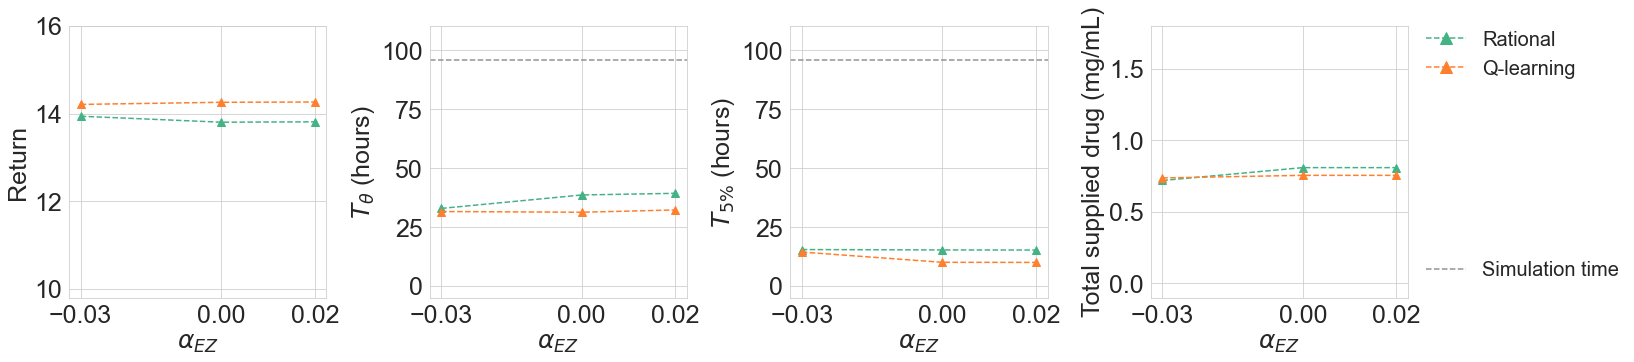

In [7]:
policies = ["Rational", "Q-learning"]
mics = [70.0]
fig, ax = policy_efficacy(policies, mics)
fig.savefig("efficacies/efficacies_micEZ70.png", bbox_inches="tight")

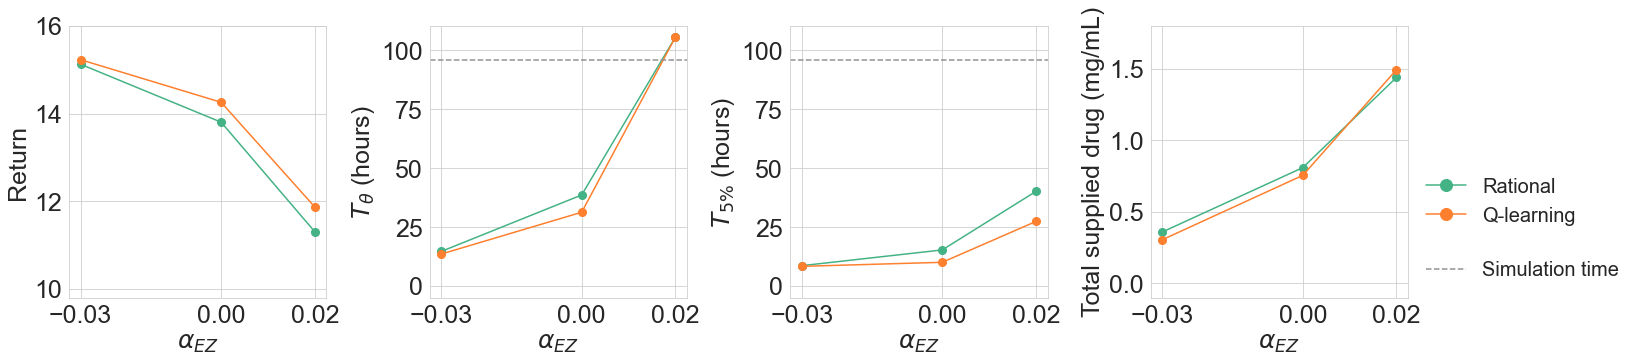

In [8]:
policies = ["Rational", "Q-learning"]
mics = [140.0]
fig, ax = policy_efficacy(policies, mics)
fig.savefig("efficacies/efficacies_micZ140.png", bbox_inches="tight")

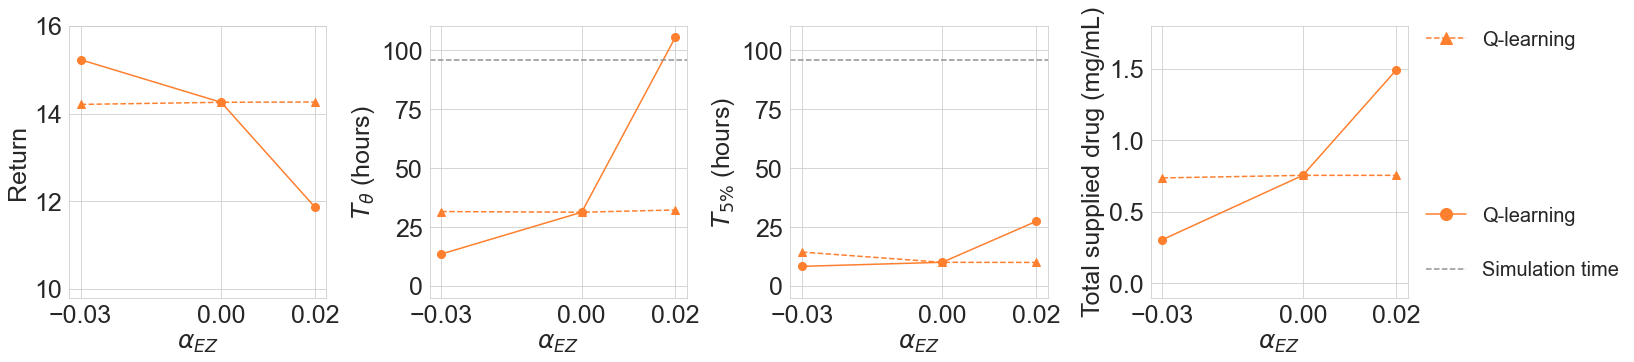

In [9]:
policies = ["Q-learning"]
mics = [70.0, 140.0]
fig, ax = policy_efficacy(policies, mics)
fig.savefig("efficacies/efficacies_qlearning.png", bbox_inches="tight")

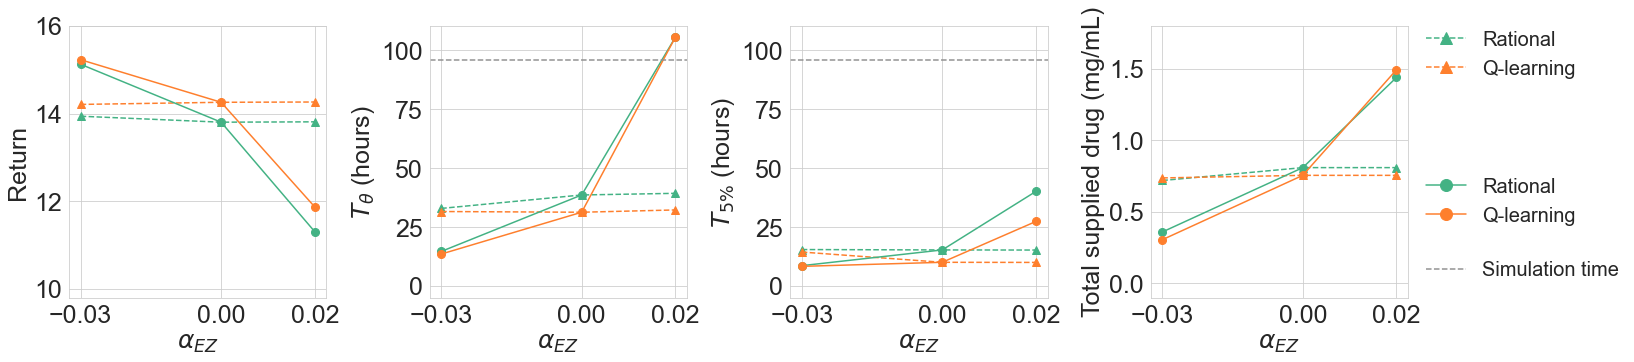

In [10]:
policies = ["Rational", "Q-learning"]
mics = [70.0, 140.0]
fig, ax = policy_efficacy(policies, mics)
fig.savefig("efficacies/efficacies.png", bbox_inches="tight")

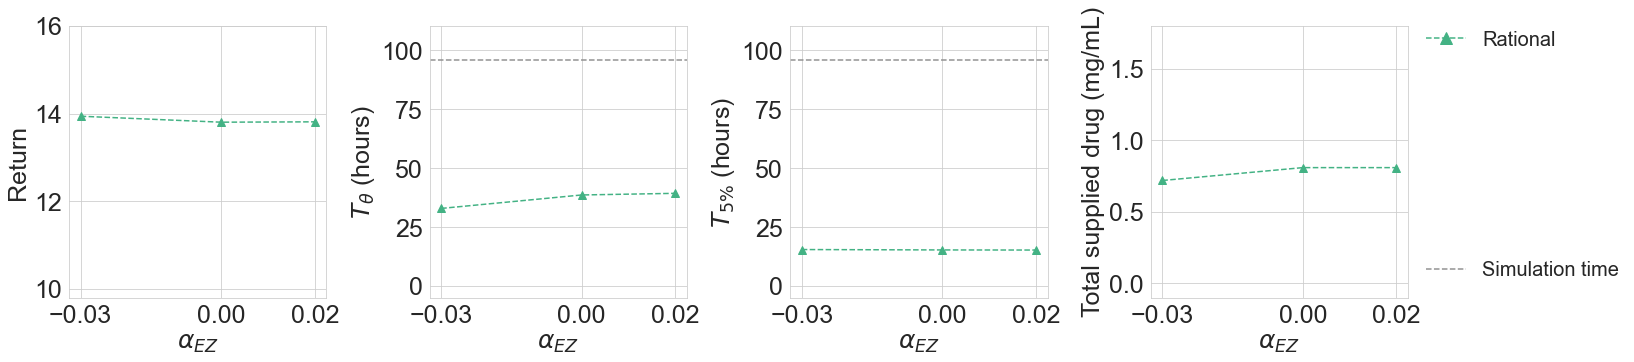

In [11]:
policies = ["Rational"]
mics = [70.0]
fig, ax = policy_efficacy(policies, mics)
fig.savefig("efficacies/rational_micEZ70.png", bbox_inches="tight")

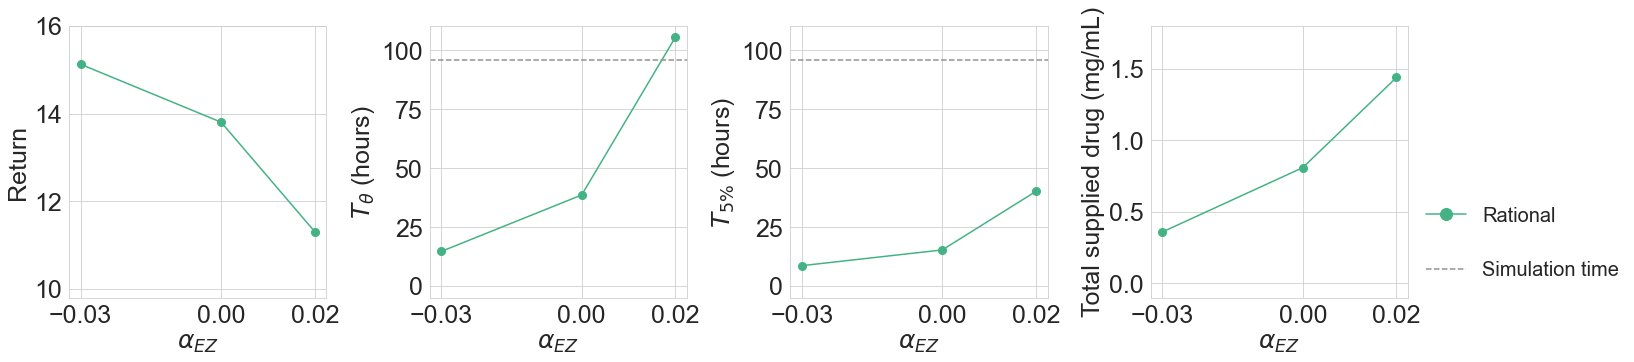

In [12]:
policies = ["Rational"]
mics = [140.0]
fig, ax = policy_efficacy(policies, mics)
fig.savefig("efficacies/rational_micZ140.png", bbox_inches="tight")